In [1]:
import inspect, os
from typing import List, Optional, Union

import numpy as np
import torch

import PIL

from diffusers import StableDiffusionInpaintPipeline

/media/workspace/richamishra/miniconda3/envs/champ/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = "cuda"
model_path = "runwayml/stable-diffusion-inpainting"

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    model_path,
    torch_dtype=torch.float16,
).to(device)

unet/diffusion_pytorch_model.safetensors not found
Loading pipeline components...: 100%|██████████| 7/7 [00:25<00:00,  3.63s/it]


In [3]:
image = PIL.Image.open("/NAS5/speech/user/richamishra/champ/data/motions/motion-01/images/0001.png").convert("RGB")
mask = PIL.Image.open("/NAS5/speech/user/richamishra/champ/data/motions/motion-01/alpha/0001.png").convert("RGB")

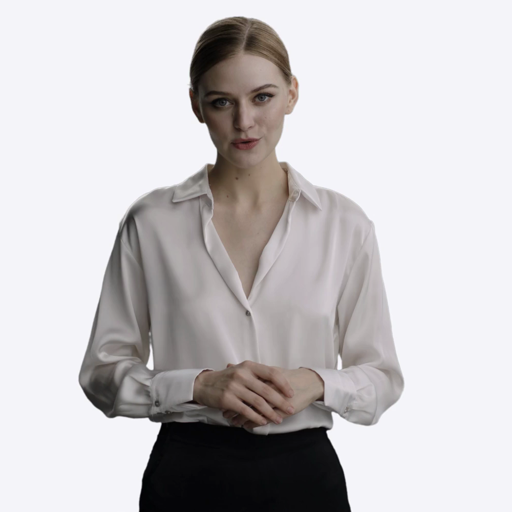

In [4]:
image

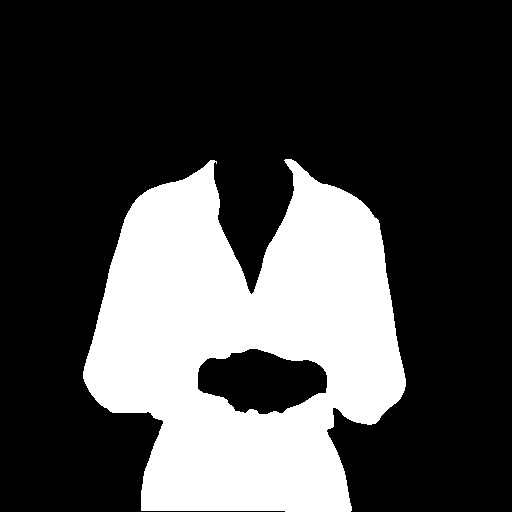

In [5]:
mask

In [26]:
prompt = "A woman dressed in a black leather jacket"

guidance_scale=7.5
num_samples = 3
generator = torch.Generator(device="cuda").manual_seed(0) # change the seed to get different results

images = pipe(
    prompt=prompt,
    image=image,
    mask_image=mask,
    guidance_scale=guidance_scale,
    generator=generator,
    num_images_per_prompt=num_samples,
).images

100%|██████████| 50/50 [00:03<00:00, 14.88it/s]


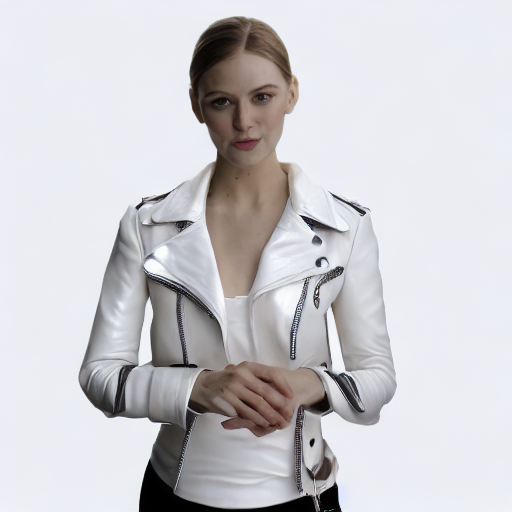

In [25]:
images[0]#.save(os.path.join("/NAS5/speech/user/richamishra/champ/data/ref_images", 'red_blue_denim.png'))